# Classification using Vehicles data

### Installation

1. !pip install seaborn

# Importing Libraries

In [1]:
import pandas as pd #for the data structures
import numpy as np #for computation
import random
import seaborn as sns
from sklearn.model_selection import train_test_split #for processing and prediction
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt #for plotting
%matplotlib inline
import warnings
# ignore warning messages
warnings.filterwarnings("ignore") 

In [2]:
# Reading the dataset and defining -1 as the null value in the dataset
missing_values=["-1","N/a","na", np.nan]
 
df = pd.read_csv("data/Road_Safety_Data_Vehicles_2019.csv",na_values=missing_values,low_memory=False)
df2= pd.read_csv("data/Road_Safety_Data_Vehicles_2018.csv",na_values=missing_values,low_memory=False)
df3= pd.read_csv("data/Road_Safety_Data_Vehicles_2017.csv",na_values=missing_values,low_memory=False)

df=df.append(df2, ignore_index=True)
df=df.append(df3, ignore_index=True)
df.head() #confirm correct data is imported

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2.01901E+12,1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,58.0,9.0,NaN,NaN,NaN,2.0,1.0,2.0
1,2.01901E+12,2,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
2,2.01901E+12,1,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,2.0,24.0,5.0,NaN,NaN,NaN,3.0,1.0,3.0
3,2.01901E+12,2,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,6.0,1.0,6.0
4,2.01901E+12,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,6.0,1.0,45.0,7.0,NaN,NaN,NaN,4.0,1.0,4.0


In [3]:
# Drop rows in which values are missing for all columns leaving the columns Accident_Index and Vehicle_Reference
df.dropna(how='all',subset=['Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Journey_Purpose_of_Driver',
       'Sex_of_Driver', 'Age_of_Driver', 'Age_Band_of_Driver',
       'Engine_Capacity_(CC)', 'Propulsion_Code', 'Age_of_Vehicle',
       'Driver_IMD_Decile', 'Driver_Home_Area_Type', 'Vehicle_IMD_Decile'])

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2.01901E+12,1,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,58.0,9.0,NaN,NaN,NaN,2.0,1.0,2.0
1,2.01901E+12,2,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2.0
2,2.01901E+12,1,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,2.0,24.0,5.0,NaN,NaN,NaN,3.0,1.0,3.0
3,2.01901E+12,2,9.0,0.0,18.0,NaN,0.0,NaN,NaN,NaN,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,6.0,1.0,6.0
4,2.01901E+12,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,...,6.0,1.0,45.0,7.0,NaN,NaN,NaN,4.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530865,2017984121717,1,19.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,...,1.0,2.0,38.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
530866,2017984121717,2,21.0,1.0,18.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,63.0,9.0,12777.0,2.0,NaN,5.0,2.0,5.0
530867,2017984122317,1,4.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,...,6.0,1.0,25.0,5.0,498.0,1.0,16.0,NaN,1.0,NaN
530868,2017984122617,1,9.0,0.0,9.0,0.0,5.0,0.0,0.0,0.0,...,6.0,1.0,49.0,8.0,1997.0,2.0,NaN,NaN,3.0,NaN


The number of rows and columns is same as the original dataset which states that no rows are dropped. This means that none of the rows have missing values for all the columns

In [4]:
#Replacing the value of the lable other vehicles to null so that it can be covered in the available categories because the available lables cover approximately most vehicle types
df['Vehicle_Type'].replace(90.0,np.nan, inplace=True)

#Get new count of null values
df['Vehicle_Type'].isnull().sum()

4217

In [5]:
#Filling the null values by 9 and getting the new % for every value
df['Vehicle_Type'].fillna(9, inplace=True)
df['Vehicle_Type'].value_counts()/df.shape[0]*100

9.0     70.496920
1.0      8.180722
19.0     5.319758
3.0      3.826737
5.0      2.512103
8.0      2.462561
11.0     2.123684
21.0     1.573643
4.0      1.047149
2.0      0.777026
98.0     0.501629
20.0     0.457551
17.0     0.198165
10.0     0.194210
97.0     0.160115
22.0     0.100024
16.0     0.032965
23.0     0.024865
18.0     0.010172
Name: Vehicle_Type, dtype: float64

# Towing_and_Articulation

In [6]:
#Filling the null values with 0
df['Towing_and_Articulation'].fillna(0, inplace=True)
df['Towing_and_Articulation'].value_counts()/df.shape[0]*100

0.0    98.542016
1.0     0.895134
4.0     0.321736
5.0     0.151450
3.0     0.073464
2.0     0.016200
Name: Towing_and_Articulation, dtype: float64

# Vehicle_Manoeuvre

In [7]:
# Imputing values using ffill and getting the no. of null values after ffill
df['Vehicle_Manoeuvre'].fillna(method='ffill', inplace=True)
df['Vehicle_Manoeuvre'].isnull().sum()

2

In [8]:
#Impute remaining values using bfill 
df['Vehicle_Manoeuvre'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Vehicle_Manoeuvre'].isnull().sum()

0

# Vehicle_Location-Restricted_Lane

In [9]:
#impute o for missing values. get percentage of every value.
df['Vehicle_Location-Restricted_Lane'].fillna(0, inplace=True)
df['Vehicle_Location-Restricted_Lane'].value_counts()/df.shape[0]*100

0.0    96.977038
9.0     1.259442
2.0     0.605421
4.0     0.430614
6.0     0.305348
5.0     0.147305
8.0     0.122629
7.0     0.060655
3.0     0.048599
1.0     0.042948
Name: Vehicle_Location-Restricted_Lane, dtype: float64

# Junction_Location

In [10]:
# ffill to impute to ensure proper imputation based on the weights of the existing values
df['Junction_Location'].fillna(method='ffill', inplace=True)

# Check no of missing values after ffill imputation
df['Junction_Location'].isnull().sum()

2

In [11]:
#bfill for the Values which are not imputed by ffill
df['Junction_Location'].fillna(method='bfill', inplace=True)

# Check no of missing values after bfill imputation
df['Junction_Location'].isnull().sum()

0

# Skidding_and_Overturning

In [12]:
#Imputing the missing values by 0
df['Skidding_and_Overturning'].fillna(0, inplace=True)

# Hit_Object_in_Carriageway 

In [13]:
#Impute using ffill 
df['Hit_Object_in_Carriageway'].fillna(method='ffill', inplace=True)

#get null values after ffill
df['Hit_Object_in_Carriageway'].isnull().sum()

4

In [14]:
#Impute values using bfill
df['Hit_Object_in_Carriageway'].fillna(method='bfill', inplace=True)

#get null values after bfill
df['Hit_Object_in_Carriageway'].isnull().sum()

0

# Vehicle_Leaving_Carriageway

In [15]:
#Using ffill to impute
df['Vehicle_Leaving_Carriageway'].fillna(method='ffill', inplace=True)

#get null values after ffill
df['Vehicle_Leaving_Carriageway'].isnull().sum()

4

In [16]:
#Use bfill to impute the remaining
df['Vehicle_Leaving_Carriageway'].fillna(method='bfill', inplace=True)

#Check remaining null values after bfill
df['Vehicle_Leaving_Carriageway'].isnull().sum()

0

# Hit_Object_off_Carriageway

In [17]:
#Impute using ffill
df['Hit_Object_off_Carriageway'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Hit_Object_off_Carriageway'].isnull().sum()

4

In [18]:
#impute remaining values using bfill
df['Hit_Object_off_Carriageway'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Hit_Object_off_Carriageway'].isnull().sum()

0

# 1st_Point_of_Impact

In [19]:
#Impute using ffill
df['1st_Point_of_Impact'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['1st_Point_of_Impact'].isnull().sum()

0

# Was_Vehicle_Left_Hand_Drive?

In [20]:
#Replacing null values by 1
df['Was_Vehicle_Left_Hand_Drive?'].fillna(1,inplace=True)

#get value percentage
df['Was_Vehicle_Left_Hand_Drive?'].value_counts()/df.shape[0]*100

1.0    99.321868
2.0     0.678132
Name: Was_Vehicle_Left_Hand_Drive?, dtype: float64

# Journey_Purpose_of_Driver

In [21]:
#Drop the column
df.drop('Journey_Purpose_of_Driver', axis=1, inplace=True)

# Sex_of_Driver

In [22]:
# Replace the unknown values with null 
df['Sex_of_Driver'].replace(3,np.nan, inplace=True)

#get null count 
df['Sex_of_Driver'].isnull().sum()

53713

In [23]:
#Impute using ffill
df['Sex_of_Driver'].fillna(method='ffill',inplace=True)

#get null count after ffill
df['Sex_of_Driver'].isnull().sum()

0

# Age_Band_of_Driver

In [24]:
#Impute using ffill
df['Age_Band_of_Driver'].fillna(method='ffill',inplace=True)

#get null count after ffill
df['Age_Band_of_Driver'].isnull().sum()

0

# Age_of_Driver

In [25]:
# drop the column
df.drop('Age_of_Driver', axis=1, inplace=True)

# Engine_Capacity_(CC)

In [26]:
#get values for upper limit of dataset (99.99%) for outlier detection
max_val_cc=df['Engine_Capacity_(CC)'].quantile(0.9999)
max_val_cc

16353.0

In [27]:
#get values for lower limit of dataset (0.01%) for outlier detection
min_val_cc=df['Engine_Capacity_(CC)'].quantile(0.0001)
min_val_cc

49.0

In [28]:
#replacing the outliers by null
#Reference: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
df.loc[df['Engine_Capacity_(CC)']>max_val_cc,'Engine_Capacity_(CC)']=np.nan
df.loc[df['Engine_Capacity_(CC)']<min_val_cc,'Engine_Capacity_(CC)']=np.nan

In [29]:
#df['Engine_Capacity_(CC)']=df['Engine_Capacity_(CC)'].fillna(df['Engine_Capacity_(CC)'].mean())
# Use ffill for imputation because mean imputation resulted in the mean being 25% of the data
df['Engine_Capacity_(CC)'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Engine_Capacity_(CC)'].isnull().sum()

15

In [30]:
#Impute remaining values using bfill
df['Engine_Capacity_(CC)'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Engine_Capacity_(CC)'].isnull().sum()

0

# Propulsion_Code

In [31]:
#impute using ffill
df['Propulsion_Code'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Propulsion_Code'].isnull().sum()

15

In [32]:
#Impute remaining values using bfill
df['Propulsion_Code'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Propulsion_Code'].isnull().sum()

0

# Age_of_Vehicle

In [33]:
#get values for upper limit of dataset (99.99%) for outlier detection
max_val_veh_age=df['Age_of_Vehicle'].quantile(0.9999)
max_val_veh_age

61.0

In [34]:
#get values for lower limit of dataset (0.01%) for outlier detection
min_val_veh_age=df['Age_of_Vehicle'].quantile(0.0001)
min_val_veh_age

1.0

In [35]:
#Replacing outliers by null
##Reference: https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition
df.loc[df['Age_of_Vehicle']>max_val_cc,'Age_of_Vehicle']=np.nan

#get null count
df['Age_of_Vehicle'].isnull().sum()

143555

In [36]:
#Impute using ffill
df['Age_of_Vehicle'].fillna(method='ffill', inplace=True)

#get null count after ffill
df['Age_of_Vehicle'].isnull().sum()

15

In [37]:
#Impute remaining values using bfill
df['Age_of_Vehicle'].fillna(method='bfill', inplace=True)

#get null count after bfill
df['Age_of_Vehicle'].isnull().sum()

0

# Driver_IMD_Decile

In [38]:
#drop the column
df.drop('Driver_IMD_Decile', axis=1, inplace=True)

# Driver_Home_Area_Type

In [39]:
df.drop('Driver_Home_Area_Type', axis=1, inplace=True)

# Vehicle_IMD_Decile

In [40]:
#drop the column
df.drop('Vehicle_IMD_Decile', axis=1, inplace=True)

# Reference:
http://localhost:8888/notebooks/Documents/SJSU_MASTER/FALL_2020/CMPE%20256/Group_Project/Sample%20project/Traffic-Accident-Analysis-master/UK_Road_Safety_Traffic_Accidents_and_Vehicles_Data_Cleaning_and_Feature_Manipulation.ipynb

# Logistic Regression

The classification algorithms were referenced from : https://machinelearningmastery.com/machine-learning-algorithms-mini-course/

In [41]:
from sklearn.linear_model import LogisticRegression
log_class_model = LogisticRegression(random_state=4, multi_class='ovr')

In [42]:
df.shape

(530870, 18)

In [43]:
df.head(20)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle
0,2.01901E+12,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0
1,2.01901E+12,2,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,9.0,1242.0,1.0,4.0
2,2.01901E+12,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0
3,2.01901E+12,2,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0
4,2.01901E+12,1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,7.0,1242.0,1.0,4.0
5,2.01901E+12,2,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,1242.0,1.0,4.0
6,2.01901E+12,1,9.0,0.0,18.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,1242.0,1.0,4.0
7,2.01901E+12,1,9.0,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,8.0,1242.0,1.0,4.0
8,2.01901E+12,2,9.0,0.0,7.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,1242.0,1.0,4.0
9,2.01901E+12,1,9.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,1242.0,1.0,4.0


In [44]:
# Reading the dataset for the casualty information
df_cas  = pd.read_csv("data/Road_Safety_Data_Casualties_2019.csv",low_memory=False)
df_cas2 = pd.read_csv("data/Road_Safety_Data_Casualties_2018.csv",na_values=missing_values,low_memory=False)
df_cas3 = pd.read_csv("data/Road_Safety_Data_Casualties_2017.csv",na_values=missing_values,low_memory=False)

df_cas  = df_cas.append(df_cas2, ignore_index=True)
df_cas  = df_cas.append(df_cas3, ignore_index=True)
df_cas.head(20) #confirm correct data is imported

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1.0,58.0,9.0,3,0.0,0,0.0,0.0,0.0,9.0,1.0,2.0
1,2019010128300,1,2,2,2.0,-1.0,-1.0,3,0.0,0,1.0,0.0,0.0,9.0,1.0,5.0
2,2019010128300,1,3,2,2.0,-1.0,-1.0,3,0.0,0,2.0,0.0,0.0,9.0,1.0,5.0
3,2019010152270,1,1,1,2.0,24.0,5.0,3,0.0,0,0.0,0.0,0.0,9.0,1.0,3.0
4,2019010155191,2,1,2,2.0,21.0,5.0,3,0.0,0,0.0,0.0,0.0,1.0,1.0,1.0
5,2019010155192,1,1,3,1.0,68.0,10.0,2,5.0,4,0.0,0.0,0.0,0.0,1.0,4.0
6,2019010155194,1,1,1,2.0,47.0,8.0,3,0.0,0,0.0,0.0,0.0,9.0,1.0,3.0
7,2019010155194,1,2,2,2.0,16.0,4.0,3,0.0,0,1.0,0.0,0.0,9.0,1.0,3.0
8,2019010155195,1,1,1,1.0,20.0,4.0,3,0.0,0,0.0,0.0,0.0,9.0,1.0,4.0
9,2019010155195,1,2,2,1.0,41.0,7.0,3,0.0,0,2.0,0.0,0.0,9.0,1.0,5.0


In [45]:
df_cas.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [46]:
#checking the size of casualty database
df_cas.shape

(484748, 16)

We only need the casuatly seversity information from the casualty database. Dropping all other columns.

In [47]:
df_cas.drop(['Casualty_Reference','Casualty_Class','Sex_of_Casualty','Age_of_Casualty','Age_Band_of_Casualty','Pedestrian_Location','Pedestrian_Movement','Car_Passenger','Bus_or_Coach_Passenger','Pedestrian_Road_Maintenance_Worker','Casualty_Type','Casualty_Home_Area_Type','Casualty_IMD_Decile']
, axis=1, inplace=True)

In [48]:
df_cas.shape

(484748, 3)

In [49]:
df_cas.head()

,Accident_Index,Vehicle_Reference,Casualty_Severity
0,2019010128300,1,3
1,2019010128300,1,3
2,2019010128300,1,3
3,2019010152270,1,3
4,2019010155191,2,3


In [50]:
df_cas.Accident_Index.nunique()

370153

##### Merging the casulty serverity information to vehicle database

In [51]:
df_merge=pd.merge(df,df_cas)

In [52]:
df_merge.shape

(336482, 19)

In [53]:
df_merge.head(10)

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Sex_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Casualty_Severity
0,201906A152268,2,5.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,649.0,1.0,4.0,3
1,201906A152591,2,1.0,0.0,9.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,1968.0,2.0,3.0,3
2,201906A152705,1,11.0,0.0,18.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,6700.0,2.0,2.0,2
3,201906A152736,1,1.0,0.0,18.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,6700.0,2.0,2.0,3
4,201906A152777,1,19.0,0.0,14.0,9.0,1.0,0.0,0.0,7.0,0.0,3.0,1.0,1.0,7.0,2198.0,2.0,5.0,3
5,201906A153204,2,1.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,5.0,1598.0,2.0,5.0,3
6,201906A153586,1,5.0,0.0,18.0,0.0,6.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,955.0,1.0,18.0,3
7,201906A153655,1,21.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,8.0,7698.0,2.0,4.0,1
8,201906A153728,1,9.0,0.0,18.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,6.0,1461.0,2.0,3.0,3
9,201906A153947,2,1.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,6.0,2499.0,2.0,7.0,3


In [54]:
df_merge.shape

(336482, 19)

In [55]:
df_merge.isnull().sum().sort_values(ascending=False)

Casualty_Severity                   0
Hit_Object_in_Carriageway           0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Vehicle_Leaving_Carriageway         0
Age_of_Vehicle                      0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Sex_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Accident_Index                      0
dtype: int64

In [56]:
df_merge['Casualty_Severity'].describe()

count    336482.000000
mean          2.826909
std           0.405915
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: Casualty_Severity, dtype: float64

In [57]:
df_merge['Casualty_Severity'].value_counts()

3    281880
2     50962
1      3640
Name: Casualty_Severity, dtype: int64

In [58]:
df_merge['Casualty_Severity'].value_counts(normalize=True)

3    0.837727
2    0.151455
1    0.010818
Name: Casualty_Severity, dtype: float64

<AxesSubplot:>

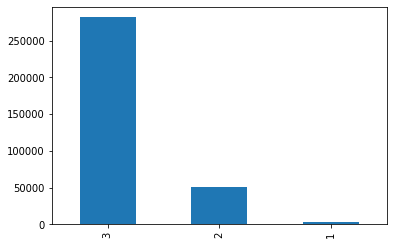

In [59]:
df_merge['Casualty_Severity'].value_counts().plot.bar()

##### As seen from the information above this dataset is unbalanced. The sample size for Casualty serverity of '1' is very low, only around 1%. Taking the dataset as is will not yeild good prediction.

In [60]:
# Splitting the data into train and test mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
df_merge.select_dtypes(include=[np.number]).columns.values

array(['Vehicle_Reference', 'Vehicle_Type', 'Towing_and_Articulation',
       'Vehicle_Manoeuvre', 'Vehicle_Location-Restricted_Lane',
       'Junction_Location', 'Skidding_and_Overturning',
       'Hit_Object_in_Carriageway', 'Vehicle_Leaving_Carriageway',
       'Hit_Object_off_Carriageway', '1st_Point_of_Impact',
       'Was_Vehicle_Left_Hand_Drive?', 'Sex_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Casualty_Severity'], dtype=object)

In [62]:
# Providing a split of 70:30 for train/test purpose

predictor_cols = ['Vehicle_Type',
'Towing_and_Articulation',
'Vehicle_Manoeuvre',
'Vehicle_Location-Restricted_Lane',
'Junction_Location',
'Skidding_and_Overturning',
'Hit_Object_in_Carriageway',
'Vehicle_Leaving_Carriageway',
'Hit_Object_off_Carriageway',
'1st_Point_of_Impact',
'Was_Vehicle_Left_Hand_Drive?',
'Sex_of_Driver',
'Age_Band_of_Driver',
'Engine_Capacity_(CC)',
'Propulsion_Code',
'Age_of_Vehicle']
X_train, X_test, y_train, y_test = train_test_split(df_merge[predictor_cols],df_merge.Casualty_Severity, test_size=0.3)

In [63]:
log_class_model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=4)

##### Measuring the accuracy of the model.

In [64]:
score_logistic = log_class_model.score(X_test, y_test)

In [65]:
score_logistic

0.8369805339541334

We got an accuracy of 81.94 percent with this model and the unbalanced dataset.
We will try to resize the database to balance it. 
We will apply the logistic regression model again after that.

##### Confusion Matrix to analyze the performance:

In [66]:
y_predicted = log_class_model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[    0,     2,  1123],
       [    0,     3, 15324],
       [    0,     7, 84486]])

In [68]:
y_predicted2 = log_class_model.predict(X_train)

In [69]:
confusion_matrix(y_train, y_predicted2)

array([[     0,      0,   2515],
       [     0,     10,  35625],
       [     0,     13, 197374]])

# Scaled dataset

##### Scaling of dataset was suggested in error due to inability to process the dataset.

In [70]:
from sklearn import preprocessing
X_SCALED = preprocessing.scale(X_train)

In [71]:
log_class_model.fit(X_SCALED, y_train)

LogisticRegression(multi_class='ovr', random_state=4)

In [72]:
score_logistic_scaled = log_class_model.score(X_test, y_test)

In [73]:
score_logistic_scaled

0.011204121056020606

### Scaling results in huge drop in accuracy

In [74]:
y_predicted = log_class_model.predict(X_test)

In [75]:
confusion_matrix(y_test, y_predicted)

array([[ 1125,     0,     0],
       [15326,     0,     1],
       [84487,     0,     6]])

# Adding more classifiers

In [76]:
import sklearn
from sklearn import ensemble

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC

# AdaBoost Default Classifier

In [78]:
ada_class_model_def = AdaBoostClassifier(random_state=4)

In [79]:
ada_class_model_def.fit(X_train, y_train)

AdaBoostClassifier(random_state=4)

In [80]:
score_ada_boost = ada_class_model_def.score(X_test, y_test)

In [81]:
score_ada_boost

0.8378324830353162

In [82]:
y_predicted = ada_class_model_def.predict(X_test)

In [83]:
confusion_matrix(y_test, y_predicted)

array([[    2,    58,  1065],
       [    3,   275, 15049],
       [   17,   178, 84298]])

# Adaboost Custom settings Classifier

Reference: https://towardsdatascience.com/machine-learning-part-17-boosting-algorithms-adaboost-in-python-d00faac6c464

In [84]:
ada_class_model_cus = AdaBoostClassifier(n_estimators=200, learning_rate = .5, random_state=4)

In [85]:
ada_class_model_cus.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=4)

In [86]:
score_ada_boost_cus = ada_class_model_cus.score(X_test, y_test)

In [87]:
score_ada_boost_cus

0.8378225766506513

##### Confusion Matrix to analyze the performance:

In [88]:
y_predicted = ada_class_model_cus.predict(X_test)

In [89]:
confusion_matrix(y_test, y_predicted)

array([[    2,    53,  1070],
       [    1,   242, 15084],
       [    5,   158, 84330]])

# RandomForestClassifier

In [90]:
rand_class_model_def = RandomForestClassifier(random_state=4)

In [91]:
rand_class_model_def.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [92]:
score_rand_class = rand_class_model_def.score(X_test, y_test)

In [93]:
score_rand_class

0.8212888206449056

##### Confusion Matrix to analyze the performance:

In [94]:
y_predicted = rand_class_model_def.predict(X_test)

In [95]:
confusion_matrix(y_test, y_predicted)

array([[   58,   233,   834],
       [  116,  2200, 13011],
       [  114,  3732, 80647]])

# BaggingClassifier

In [96]:
bagg_class_model = BaggingClassifier(random_state=4)

In [97]:
bagg_class_model.fit(X_train, y_train)

BaggingClassifier(random_state=4)

In [98]:
score_bagg_class = bagg_class_model.score(X_test, y_test)

In [99]:
score_bagg_class

0.7985536678389222

##### Confusion Matrix to analyze the performance:

In [100]:
y_predicted = bagg_class_model.predict(X_test)

In [101]:
confusion_matrix(y_test, y_predicted)

array([[   63,   301,   761],
       [  163,  3175, 11989],
       [  213,  6908, 77372]])

# DecisionTreeClassifier

In [102]:
dectree_class_model = DecisionTreeClassifier(random_state=4)

In [103]:
dectree_class_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

In [104]:
score_dectree_class = dectree_class_model.score(X_test, y_test)

In [105]:
score_dectree_class

0.7460201099608698

##### Confusion Matrix to analyze the performance:

In [106]:
y_predicted = dectree_class_model.predict(X_test)

In [107]:
confusion_matrix(y_test, y_predicted)

array([[  103,   358,   664],
       [  418,  4244, 10665],
       [  879, 12654, 70960]])

# SVM

In [108]:
svm_class_model = svm.SVC(random_state=4)

In [109]:
svm_class_model.fit(X_train, y_train)

SVC(random_state=4)

In [110]:
score_svm_class = svm_class_model.score(X_test, y_test)

In [111]:
score_svm_class

0.8370201594927931

##### Confusion Matrix to analyze the performance:

In [112]:
y_predicted = svm_class_model.predict(X_test)

In [113]:
confusion_matrix(y_test, y_predicted)

array([[    0,     0,  1125],
       [    0,     0, 15327],
       [    0,     0, 84493]])

# Comparing different models

In [114]:
x_axis = ['Logistic', 'Logistic_scaled', 'AdaBoost', 'AdaBoost_custom', 'RandomForest', 'Bagging', 'DecisionTree', 'SVM']
y_axis = [score_logistic, score_logistic_scaled, score_ada_boost, score_ada_boost_cus, score_rand_class, score_bagg_class, score_dectree_class, score_svm_class]

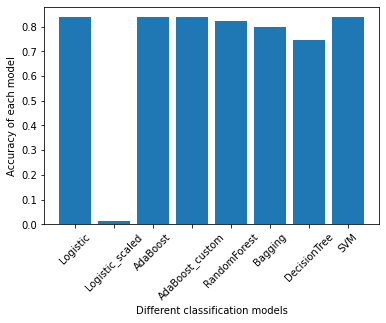

In [115]:
plt.bar(x_axis, y_axis)
plt.xlabel("Different classification models") 
plt.xticks(rotation=45)
plt.ylabel("Accuracy of each model")
plt.show()

### As seen above Scaling of data gives worst results with Logistic regression classifier. AdaBoost regression provides best results

# Undersampling

Reference:
https://github.com/codebasics/py/blob/master/DeepLearningML/14_imbalanced/handling_imbalanced_data.ipynb

In [116]:
df_severity_1 = df_merge[df_merge.Casualty_Severity == 1]
df_severity_2 = df_merge[df_merge.Casualty_Severity == 2]
df_severity_3 = df_merge[df_merge.Casualty_Severity == 3]
#df_severity_3 = df_merge[df_merge['Casualty_Severity'] == 3]

In [117]:
df_severity_1.shape

(3640, 19)

In [118]:
df_severity_2.shape

(50962, 19)

In [119]:
df_severity_3.shape

(281880, 19)

##### We will try to undersample seerity 3 with the number from severity 2. If we sample based on severity 1 the dataset will become very small

In [120]:
df_severity_3_undersampled = df_severity_3.sample(df_severity_2.shape[0])

In [121]:
df_severity_3_undersampled.shape

(50962, 19)

In [122]:
df_combined_undersampled = pd.concat([df_severity_1, df_severity_2, df_severity_3_undersampled], axis=0)

In [123]:
df_combined_undersampled.shape

(105564, 19)

In [124]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(df_combined_undersampled[predictor_cols],df_combined_undersampled.Casualty_Severity, test_size=0.3)

In [125]:
log_class_model.fit(X_train_under, y_train_under)

LogisticRegression(multi_class='ovr', random_state=4)

In [126]:
score_logistic_under = log_class_model.score(X_test_under, y_test_under)

In [127]:
score_logistic_under

0.5709504262709189

### Undersampling reduces the accuracy of the model

In [128]:
y_predicted_under = log_class_model.predict(X_test_under)

In [129]:
confusion_matrix(y_test_under, y_predicted_under)

array([[   0,  809,  267],
       [   0, 9911, 5282],
       [   0, 7230, 8171]])

# Oversampling

##### For Oversampling To oversample severity 1 to level of 3 is going to be very high over sampling. Oversampling both severity 1 and 2 to 100000 samples

In [130]:
df_severity_1_over = df_severity_1.sample(50000, replace = True)
df_severity_2_over = df_severity_2.sample(50000, replace = True)

In [131]:
df_combined_oversampled = pd.concat([df_severity_1_over, df_severity_2_over, df_severity_3], axis=0)

In [132]:
df_combined_oversampled.shape

(381880, 19)

In [133]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(df_combined_oversampled[predictor_cols],df_combined_oversampled.Casualty_Severity, test_size=0.3)

In [134]:
log_class_model.fit(X_train_over, y_train_over)

LogisticRegression(multi_class='ovr', random_state=4)

In [135]:
score_logistic_over = log_class_model.score(X_test_over, y_test_over)

In [136]:
score_logistic_over

0.7355015537166998

In [137]:
y_predicted_over = log_class_model.predict(X_test_over)

In [138]:
confusion_matrix(y_test_under, y_predicted_under)

array([[   0,  809,  267],
       [   0, 9911, 5282],
       [   0, 7230, 8171]])

In [139]:
y_axis = [score_logistic, score_logistic_under, score_logistic_over]
x_axis = ['score_logistic', 'score_logistic_under', 'score_logistic_over']

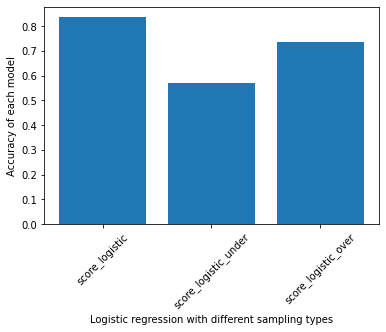

In [140]:
plt.bar(x_axis, y_axis)
plt.xlabel("Logistic regression with different sampling types") 
plt.xticks(rotation=45)
plt.ylabel("Accuracy of each model")
plt.show()

### As seen in the graph above over sampling and under sampling of this inbalanced data is not improving the accuracy